発見CSVファイル数: 16
[INFO] 外れ値率: 30.0%  N_TREES=200

📂 20251003142418-TorIP_geocoded
  総点数: 1135 / 正常: 795 / 異常: 340 (約 30.0% )
  score_samples: min=-0.7540  max=-0.3429  mean_inlier=-0.3773  mean_outlier=-0.5450


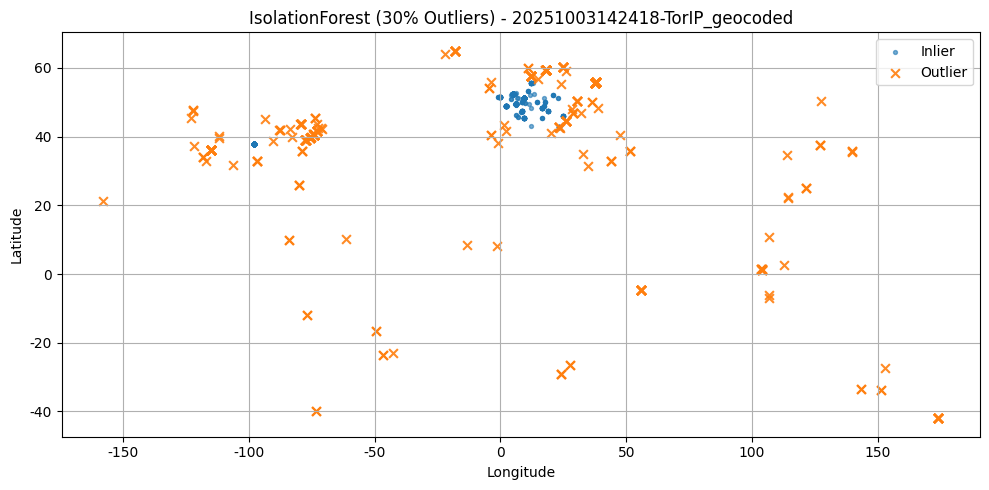


📂 20251003143810-TorIP_geocoded
  総点数: 1134 / 正常: 795 / 異常: 339 (約 29.9% )
  score_samples: min=-0.7588  max=-0.3408  mean_inlier=-0.3752  mean_outlier=-0.5431


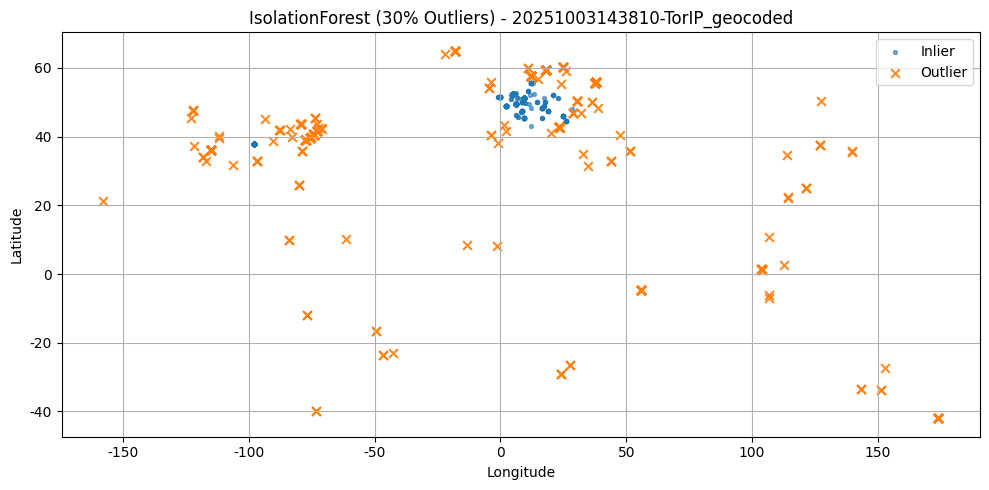


📂 20251003164852-TorIP_geocoded
  総点数: 1132 / 正常: 797 / 異常: 335 (約 29.6% )
  score_samples: min=-0.7607  max=-0.3413  mean_inlier=-0.3756  mean_outlier=-0.5432


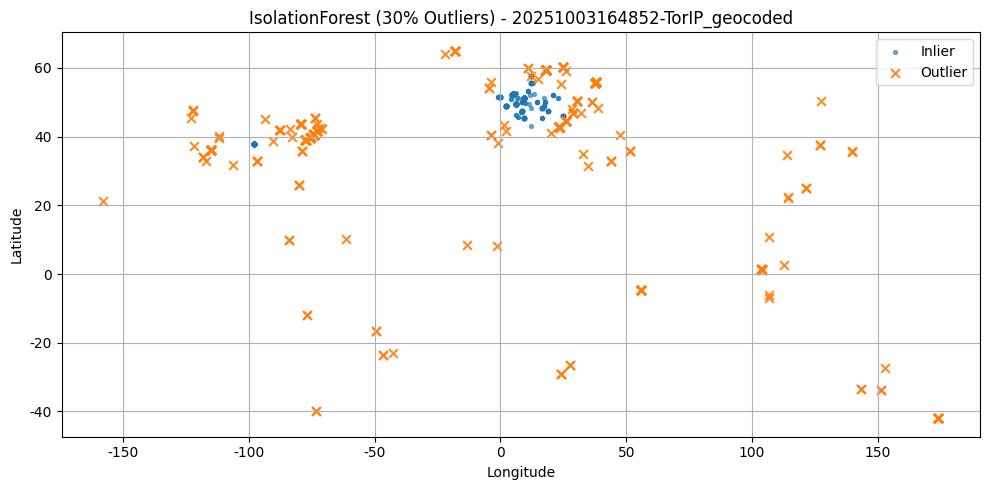


📂 20251003172946-TorIP_geocoded
  総点数: 1132 / 正常: 797 / 異常: 335 (約 29.6% )
  score_samples: min=-0.7607  max=-0.3413  mean_inlier=-0.3756  mean_outlier=-0.5432


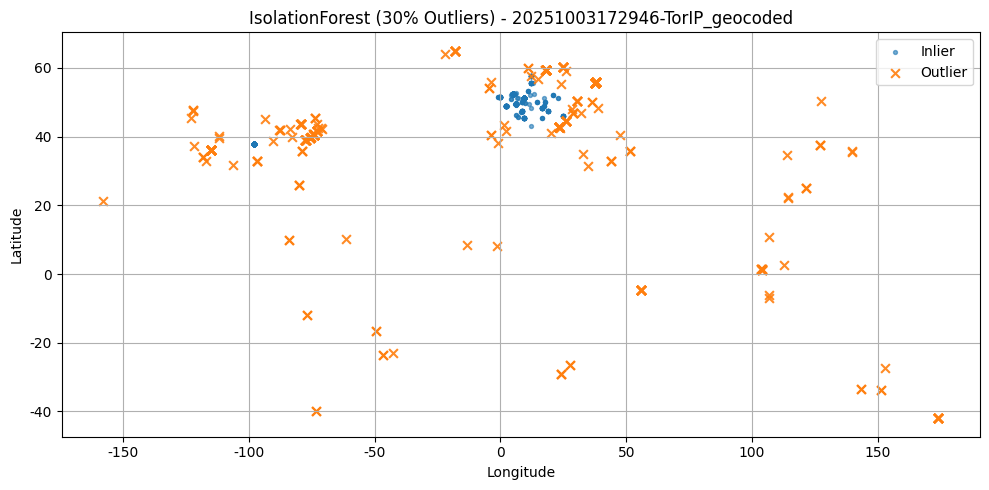


📂 20251003173524-TorIP_geocoded
  総点数: 1132 / 正常: 797 / 異常: 335 (約 29.6% )
  score_samples: min=-0.7607  max=-0.3413  mean_inlier=-0.3756  mean_outlier=-0.5432


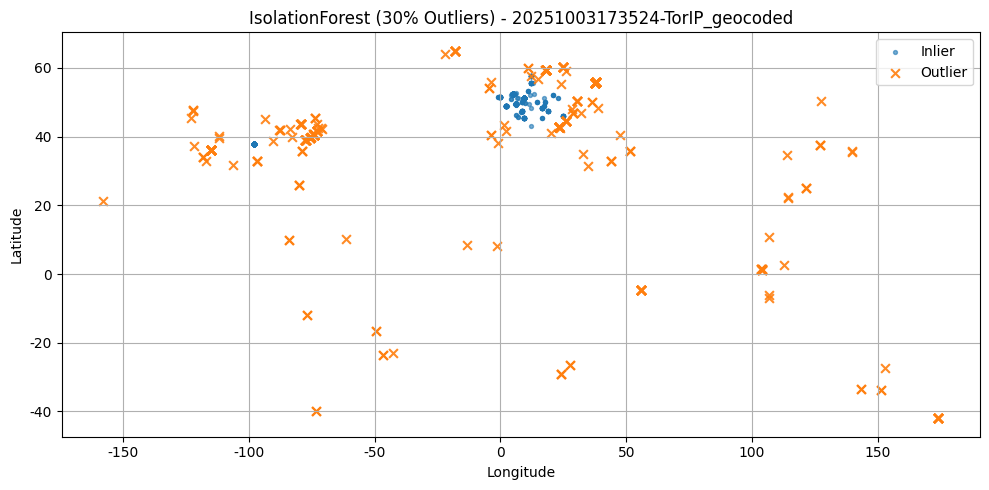


📂 20251004173514-TorIP_geocoded
  総点数: 1138 / 正常: 798 / 異常: 340 (約 29.9% )
  score_samples: min=-0.7537  max=-0.3410  mean_inlier=-0.3749  mean_outlier=-0.5438


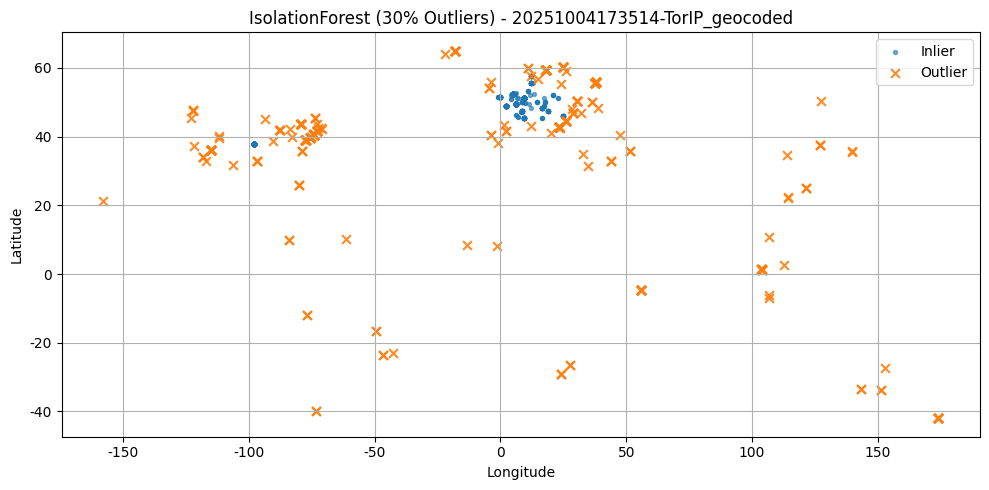


📂 20251005173523-TorIP_geocoded
  総点数: 1128 / 正常: 801 / 異常: 327 (約 29.0% )
  score_samples: min=-0.7542  max=-0.3432  mean_inlier=-0.3791  mean_outlier=-0.5492


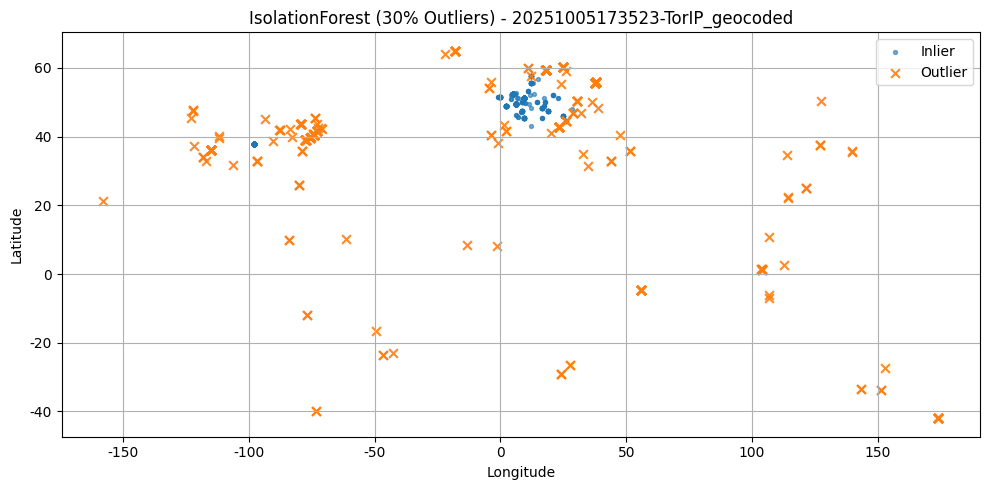


📂 20251006173520-TorIP_geocoded
  総点数: 1129 / 正常: 806 / 異常: 323 (約 28.6% )
  score_samples: min=-0.7501  max=-0.3418  mean_inlier=-0.3794  mean_outlier=-0.5505


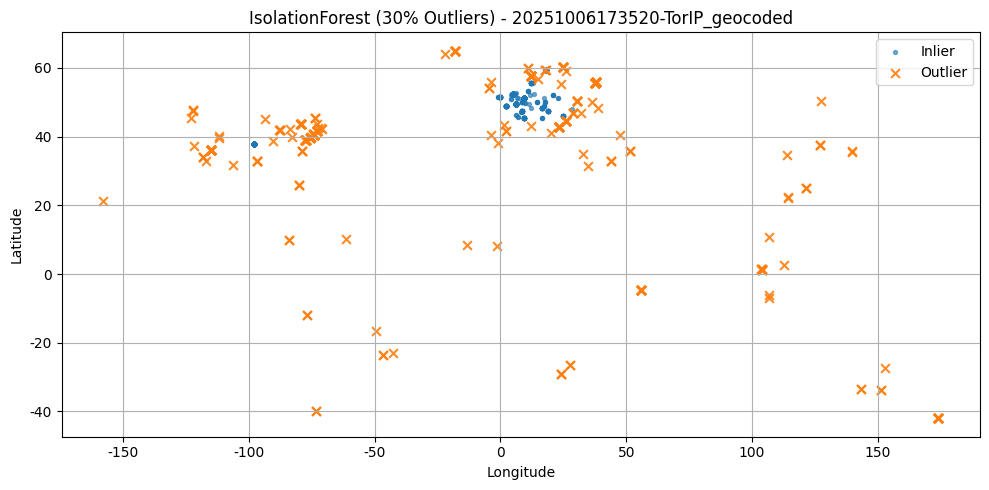


📂 20251007173522-TorIP_geocoded
  総点数: 1135 / 正常: 818 / 異常: 317 (約 27.9% )
  score_samples: min=-0.7471  max=-0.3455  mean_inlier=-0.3829  mean_outlier=-0.5538


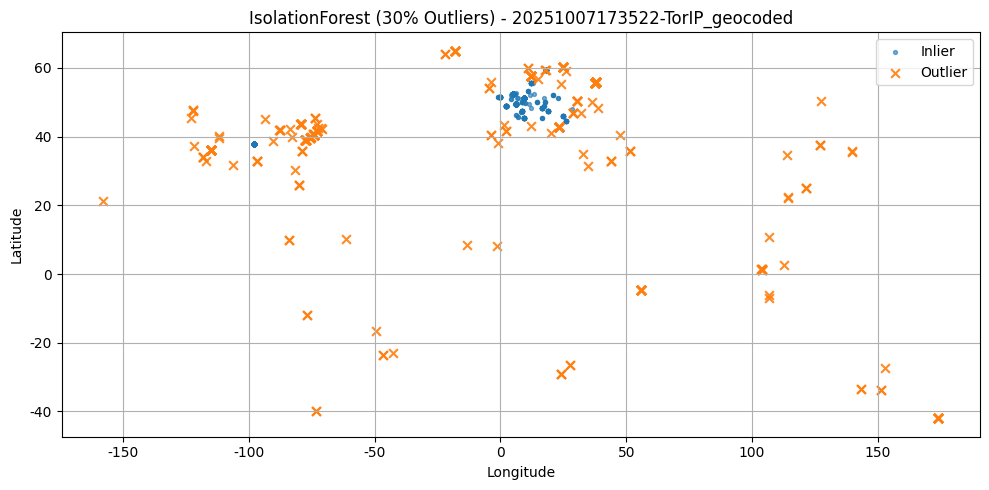


📂 20251008173518-TorIP_geocoded
  総点数: 1134 / 正常: 794 / 異常: 340 (約 30.0% )
  score_samples: min=-0.7514  max=-0.3402  mean_inlier=-0.3749  mean_outlier=-0.5441


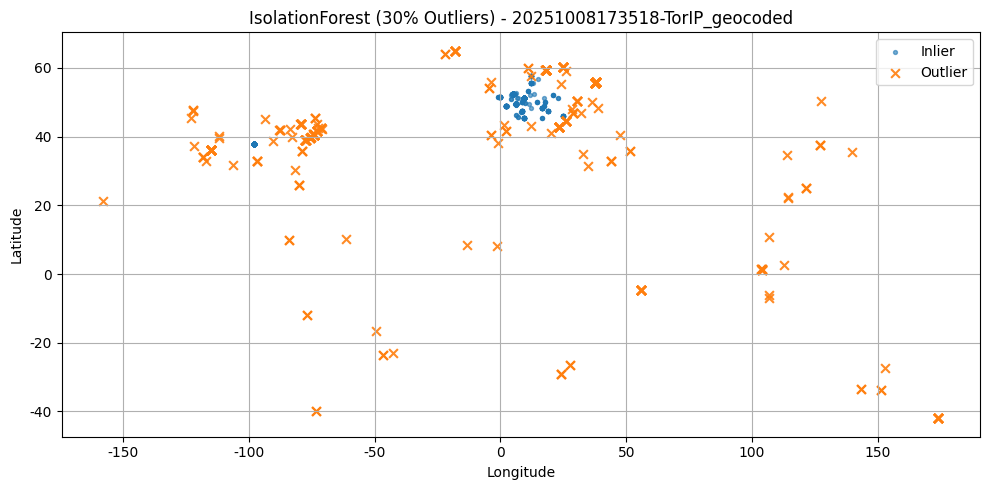


📂 20251009173527-TorIP_geocoded
  総点数: 1135 / 正常: 801 / 異常: 334 (約 29.4% )
  score_samples: min=-0.7484  max=-0.3415  mean_inlier=-0.3760  mean_outlier=-0.5443


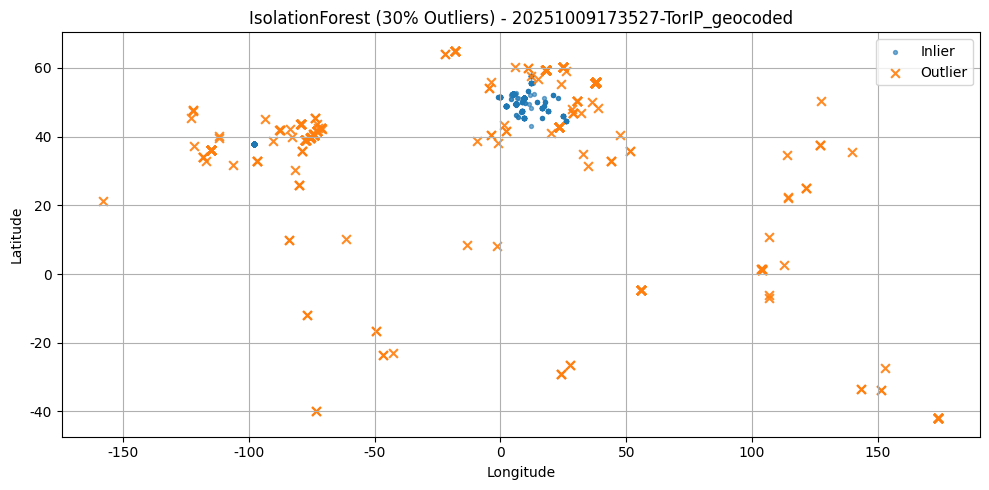


📂 20251010173526-TorIP_geocoded
  総点数: 1147 / 正常: 805 / 異常: 342 (約 29.8% )
  score_samples: min=-0.7540  max=-0.3414  mean_inlier=-0.3773  mean_outlier=-0.5451


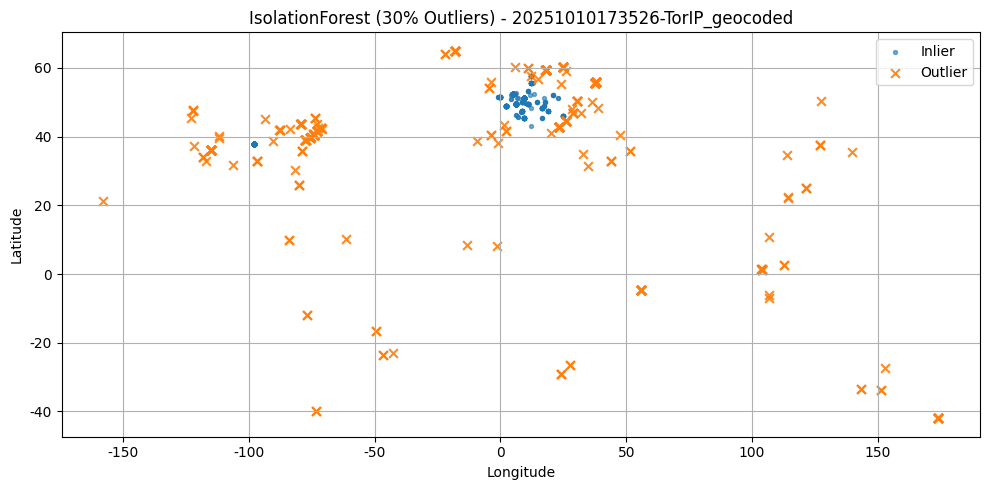


📂 20251011173523-TorIP_geocoded
  総点数: 1146 / 正常: 803 / 異常: 343 (約 29.9% )
  score_samples: min=-0.7529  max=-0.3451  mean_inlier=-0.3798  mean_outlier=-0.5444


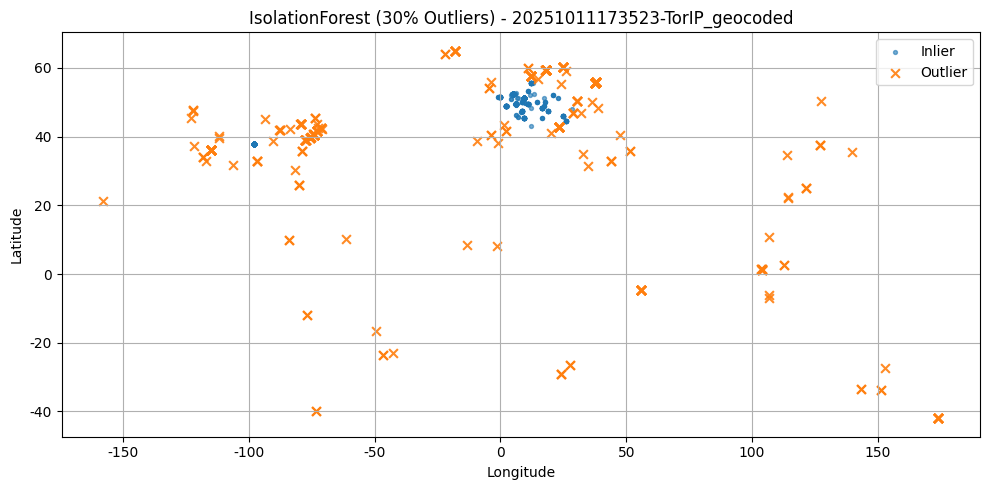


📂 20251012173526-TorIP_geocoded
  総点数: 1149 / 正常: 816 / 異常: 333 (約 29.0% )
  score_samples: min=-0.7418  max=-0.3430  mean_inlier=-0.3794  mean_outlier=-0.5507


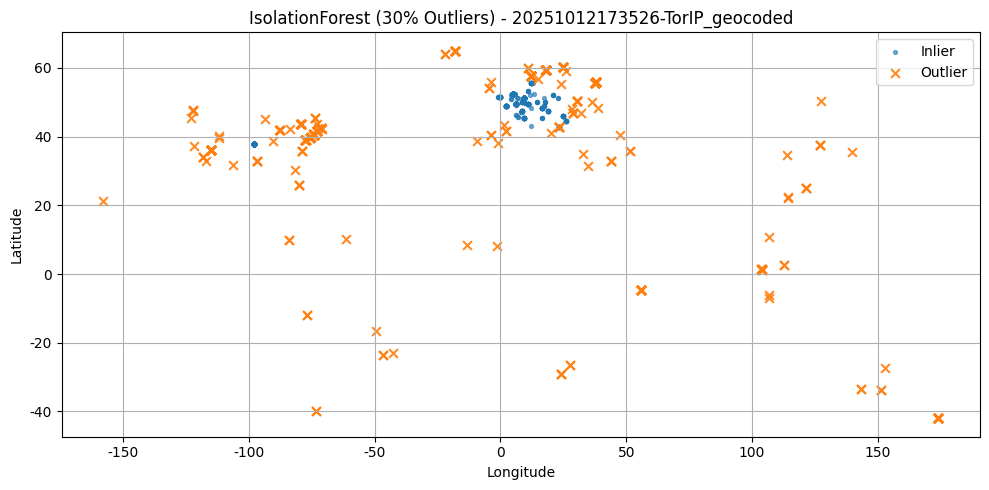


📂 20251013173525-TorIP_geocoded
  総点数: 1151 / 正常: 809 / 異常: 342 (約 29.7% )
  score_samples: min=-0.7583  max=-0.3408  mean_inlier=-0.3741  mean_outlier=-0.5407


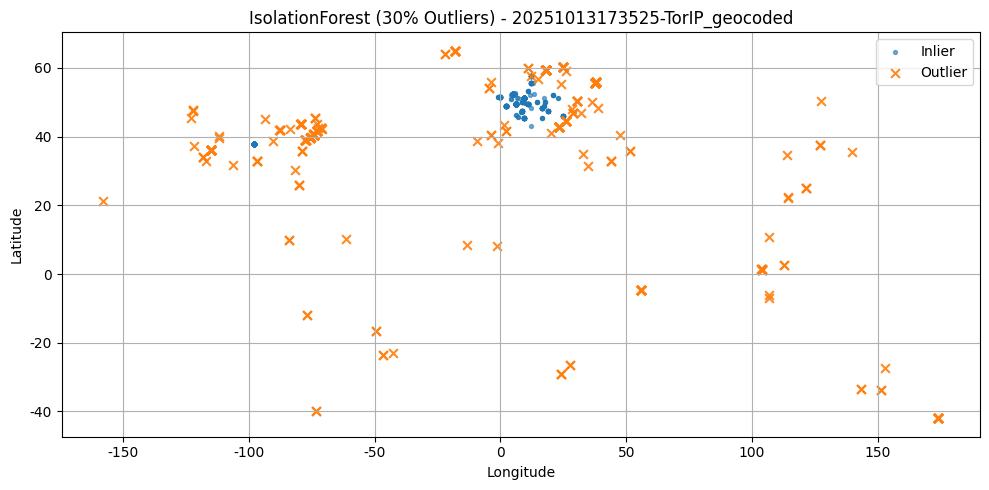


📂 20251014173524-TorIP_geocoded
  総点数: 1149 / 正常: 806 / 異常: 343 (約 29.9% )
  score_samples: min=-0.7517  max=-0.3428  mean_inlier=-0.3779  mean_outlier=-0.5443


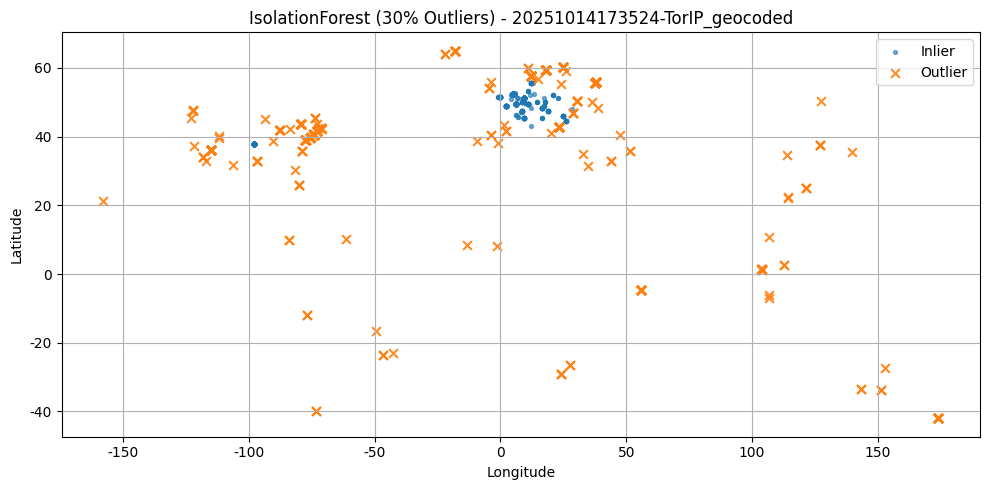

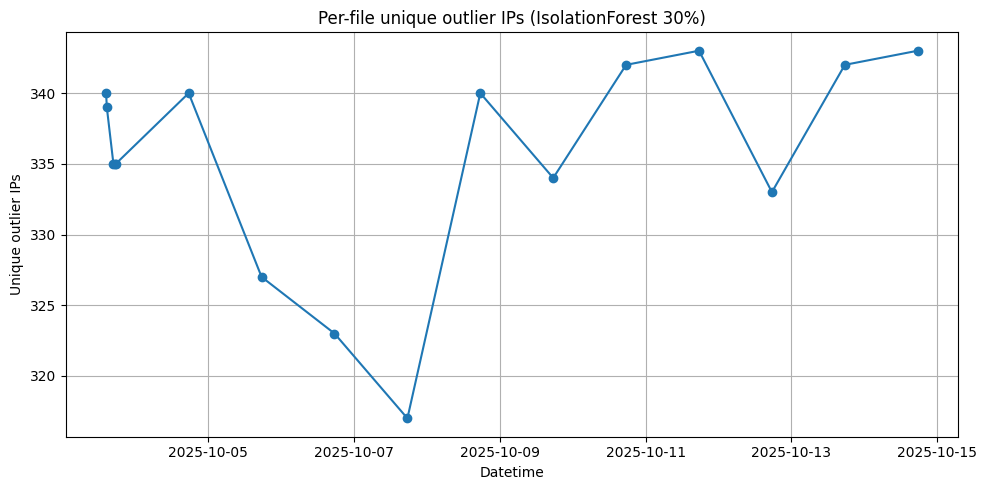

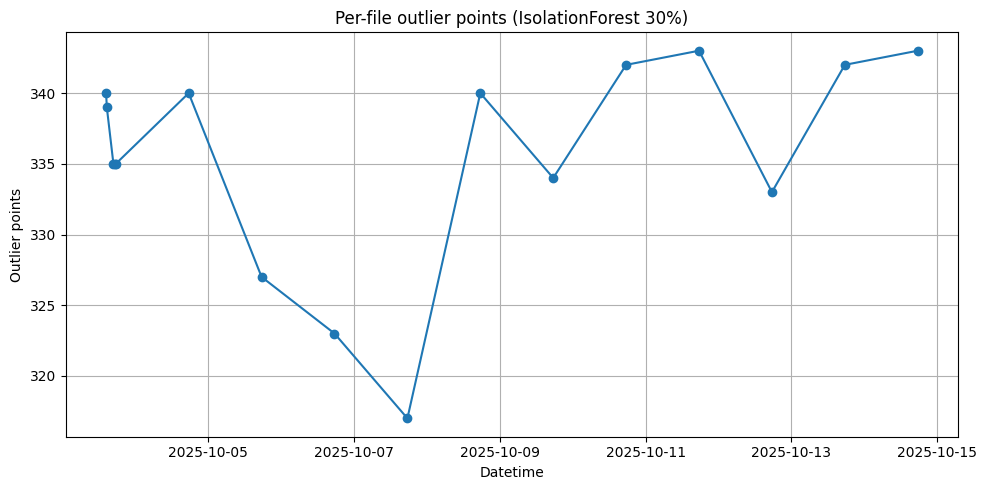

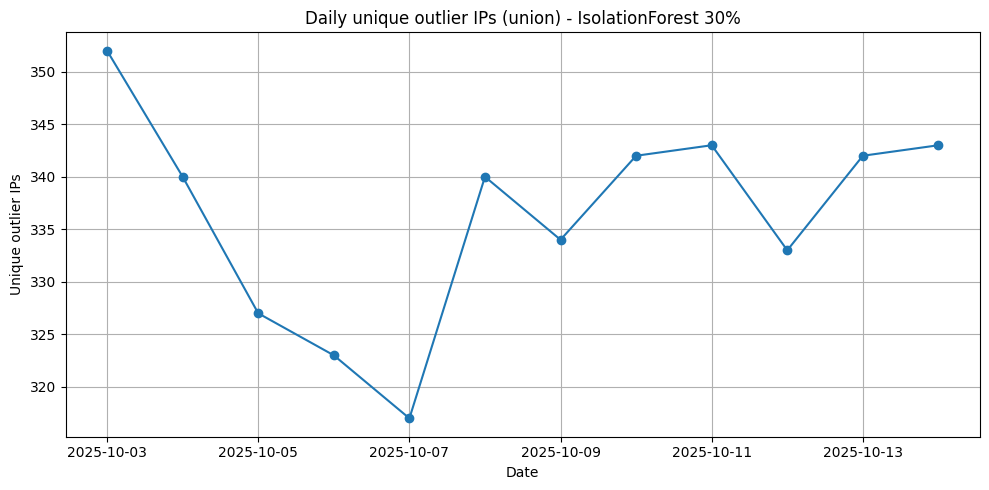


--- 集計結果（先頭10件）---
                         file            datetime  outlier_ip_count  outlier_point_count
20251003142418-TorIP_geocoded 2025-10-03 14:24:18               340                  340
20251003143810-TorIP_geocoded 2025-10-03 14:38:10               339                  339
20251003164852-TorIP_geocoded 2025-10-03 16:48:52               335                  335
20251003172946-TorIP_geocoded 2025-10-03 17:29:46               335                  335
20251003173524-TorIP_geocoded 2025-10-03 17:35:24               335                  335
20251004173514-TorIP_geocoded 2025-10-04 17:35:14               340                  340
20251005173523-TorIP_geocoded 2025-10-05 17:35:23               327                  327
20251006173520-TorIP_geocoded 2025-10-06 17:35:20               323                  323
20251007173522-TorIP_geocoded 2025-10-07 17:35:22               317                  317
20251008173518-TorIP_geocoded 2025-10-08 17:35:18               340                  340


In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# ======== 固定パラメータ設定（ここだけ変えればOK） ========
RATE       = 0.30  # 外れ値率（例: 0.03 = 3%, 0.30 = 30%）
ZIP_PATH   = "./isolation_forest.zip"
EXTRACT_DIR= "./isolation_forest_all"
N_TREES    = 200   # IsolationForestの木の本数
RANDOM_SEED= 42
# ==========================================================

import os, zipfile, re, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# ===== UTF-8/描画対策 =====
try:
    sys.stdout.reconfigure(encoding="utf-8")
except Exception:
    pass
plt.rcParams["axes.unicode_minus"] = False

# ===== ZIP展開 =====
os.makedirs(EXTRACT_DIR, exist_ok=True)
with zipfile.ZipFile(ZIP_PATH, "r") as z:
    z.extractall(EXTRACT_DIR)

# ===== CSV一覧 =====
csv_files = []
for root, _, files in os.walk(EXTRACT_DIR):
    for f in files:
        if f.lower().endswith(".csv"):
            csv_files.append(os.path.join(root, f))
csv_files.sort()
print(f"発見CSVファイル数: {len(csv_files)}")
print(f"[INFO] 外れ値率: {RATE*100:.1f}%  N_TREES={N_TREES}")

# ===== 緯度経度検出 =====
def detect_lat_lon_columns(columns):
    lat = next((c for c in columns if "lat" in c.lower()), None)
    lon = next((c for c in columns if ("lon" in c.lower()) or ("lng" in c.lower()) or ("longi" in c.lower())), None)
    return lat, lon

# ===== IPv4 抽出関連 =====
IPV4_RE = re.compile(r"\b(?:(?:25[0-5]|2[0-4]\d|1?\d?\d)\.){3}(?:25[0-5]|2[0-4]\d|1?\d?\d)\b")

def find_ipv4_in_text(text):
    if not isinstance(text, str):
        return None
    m = IPV4_RE.search(text)
    return m.group(0) if m else None

def detect_ip_column(df):
    lower = [c.lower() for c in df.columns]
    for p in ["ip", "ip_address", "source_ip", "src_ip", "dst_ip", "address", "client_ip", "remote_ip"]:
        if p in lower:
            return df.columns[lower.index(p)]
    for c in df.columns:
        if "ip" in c.lower():
            return c
    return None

# ===== ファイル名 → 日時 =====
def filename_to_datetime(fname):
    m14 = re.search(r"(\d{14})", fname)
    if m14:
        return pd.to_datetime(m14.group(1), format="%Y%m%d%H%M%S", errors="coerce")
    m8 = re.search(r"(\d{8})", fname)
    if m8:
        return pd.to_datetime(m8.group(1), format="%Y%m%d", errors="coerce")
    return pd.NaT

# ===== 各ファイル処理 =====
per_file = []

for path in csv_files:
    try:
        df = pd.read_csv(path)
    except Exception as e:
        print(f"[SKIP] 読み込み失敗 {path}: {e}")
        continue

    lat_col, lon_col = detect_lat_lon_columns(df.columns)
    if not lat_col or not lon_col:
        print(f"[SKIP] {os.path.basename(path)}: 緯度経度列が見つかりません")
        continue

    # 前処理
    df = df.copy()
    df[lat_col] = pd.to_numeric(df[lat_col], errors="coerce")
    df[lon_col] = pd.to_numeric(df[lon_col], errors="coerce")
    df = df.dropna(subset=[lat_col, lon_col])
    df = df[(df[lat_col].between(-90, 90)) & (df[lon_col].between(-180, 180))]
    if len(df) < 5:
        print(f"[SKIP] {os.path.basename(path)}: 有効行が少ない (n={len(df)})")
        continue

    X = df[[lon_col, lat_col]].to_numpy()
    n = len(X)

    # ===== Isolation Forest =====
    iso = IsolationForest(
        n_estimators=N_TREES,
        contamination=RATE,
        max_samples="auto",
        random_state=RANDOM_SEED,
        n_jobs=-1
    )
    y_pred = iso.fit_predict(X)       # +1=inlier, -1=outlier
    scores = iso.score_samples(X)     # 大きいほど正常（相対値）

    is_out = (y_pred == -1)
    inliers = ~is_out

    # 出力
    fname = os.path.basename(path).replace(".csv", "")
    print(f"\n📂 {fname}")
    print(f"  総点数: {n} / 正常: {int(inliers.sum())} / 異常: {int(is_out.sum())} (約 {is_out.sum()/n*100:.1f}% )")
    if inliers.any():
        in_mean = scores[inliers].mean()
    else:
        in_mean = float("nan")
    if is_out.any():
        out_mean = scores[is_out].mean()
    else:
        out_mean = float("nan")
    print(f"  score_samples: min={scores.min():.4f}  max={scores.max():.4f}  mean_inlier={in_mean:.4f}  mean_outlier={out_mean:.4f}")

    # プロット（緯度×経度）
    plt.figure(figsize=(10, 5))
    plt.scatter(X[inliers, 0], X[inliers, 1], s=8, alpha=0.6, label="Inlier")
    plt.scatter(X[is_out, 0],  X[is_out, 1],  s=40, alpha=0.9, marker="x", label="Outlier")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"IsolationForest ({int(RATE*100)}% Outliers) - {fname}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 外れ値IP抽出
    ip_col = detect_ip_column(df)
    ip_set = set()
    if ip_col:
        for s in df.loc[is_out, ip_col].astype(str):
            m = IPV4_RE.search(s)
            if m:
                ip_set.add(m.group(0))
    else:
        text_cols = [c for c in df.columns if df[c].dtype == "object"]
        if text_cols:
            concat_text = df[text_cols].astype(str).agg(" ".join, axis=1)
            for s in concat_text[is_out]:
                m = IPV4_RE.search(s)
                if m:
                    ip_set.add(m.group(0))

    dt = filename_to_datetime(fname)
    date = pd.to_datetime(dt.date()) if pd.notna(dt) else pd.NaT
    per_file.append({
        "file": fname,
        "datetime": dt,
        "date": date,
        "outlier_ip_count": len(ip_set),     # 外れ値IP（ユニーク件数）
        "outlier_point_count": int(is_out.sum()),  # 外れ値“座標”数（参考）
        "ip_set": ip_set
    })

# ===== 集計・日別プロット =====
per_file_df = pd.DataFrame(per_file).dropna(subset=["datetime"]).sort_values("datetime")

if per_file_df.empty:
    print("外れ値集計なし。")
else:
    # 各CSVごとのユニーク外れ値IP数
    plt.figure(figsize=(10, 5))
    plt.plot(per_file_df["datetime"], per_file_df["outlier_ip_count"], marker="o")
    plt.title(f"Per-file unique outlier IPs (IsolationForest {int(RATE*100)}%)")
    plt.xlabel("Datetime")
    plt.ylabel("Unique outlier IPs")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 参考：各CSVの外れ値“座標”数
    plt.figure(figsize=(10, 5))
    plt.plot(per_file_df["datetime"], per_file_df["outlier_point_count"], marker="o")
    plt.title(f"Per-file outlier points (IsolationForest {int(RATE*100)}%)")
    plt.xlabel("Datetime")
    plt.ylabel("Outlier points")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 日別ユニオン（同日の複数CSV間で重複IP排除）
    day_union = {}
    for _, row in per_file_df.dropna(subset=["date"]).iterrows():
        d = row["date"]
        s = row["ip_set"]
        day_union.setdefault(d, set()).update(s)

    per_day = [{"date": d, "unique_outlier_ips_union": len(day_union[d])} for d in sorted(day_union.keys())]
    per_day_df = pd.DataFrame(per_day)

    if not per_day_df.empty:
        plt.figure(figsize=(10, 5))
        plt.plot(per_day_df["date"], per_day_df["unique_outlier_ips_union"], marker="o")
        plt.title(f"Daily unique outlier IPs (union) - IsolationForest {int(RATE*100)}%")
        plt.xlabel("Date")
        plt.ylabel("Unique outlier IPs")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    print("\n--- 集計結果（先頭10件）---")
    print(per_file_df[["file", "datetime", "outlier_ip_count", "outlier_point_count"]].head(10).to_string(index=False))
